# Thực hành Khai thác dữ liệu - Tuần 8 
Họ và tên : Nguyễn Tiến Phong \
MSSV : 20280071

 # Gom cụm dựa vào Mô hình hỗn hợp Gaussian

In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random
from pandas import DataFrame
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

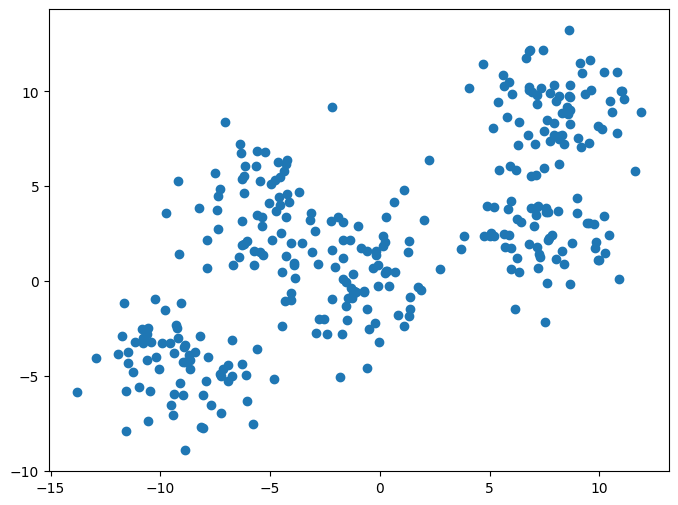

In [2]:
random.seed(234)
x, _ = make_blobs(n_samples=330, centers=5, cluster_std=1.84)
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [3]:
gm = GaussianMixture(n_components=5).fit(x)
centers = gm.means_
centers

array([[-5.55839384,  3.87288254],
       [ 7.28633633,  2.54355009],
       [-9.1828898 , -4.4785241 ],
       [ 8.10880025,  9.23182354],
       [-0.90236602,  0.16316915]])

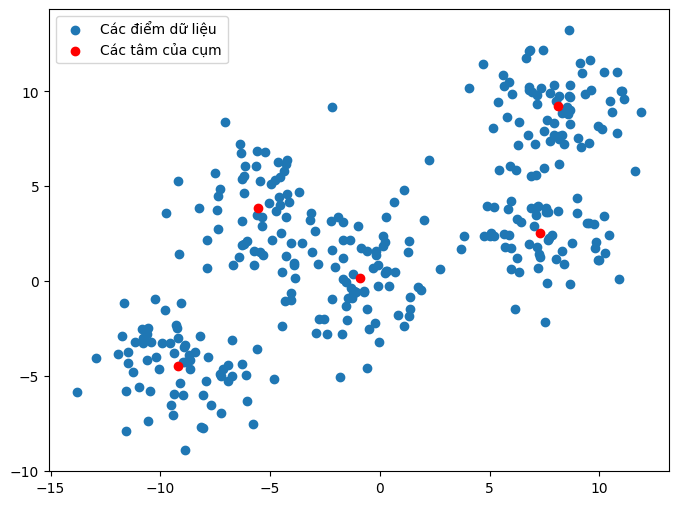

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], label="Các điểm dữ liệu")
plt.scatter(centers[:, 0], centers[:, 1], c='r', label="Các tâm của cụm")
plt.legend()
plt.show()

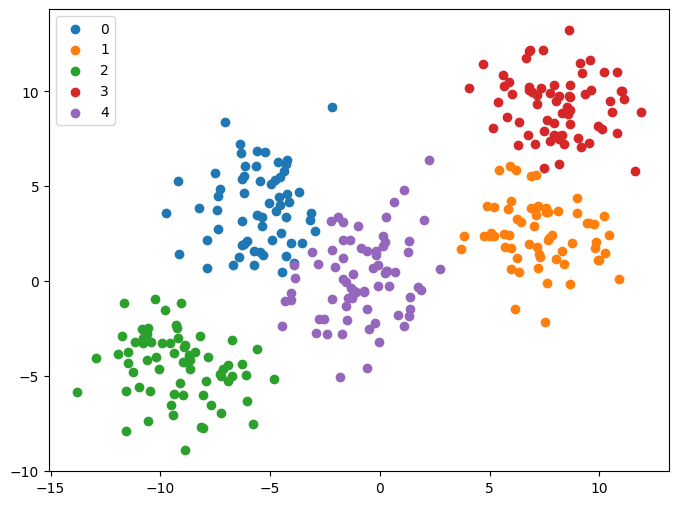

In [5]:
pred = gm.predict(x)
df = DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label': pred})
groups = df.groupby('label')

ig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

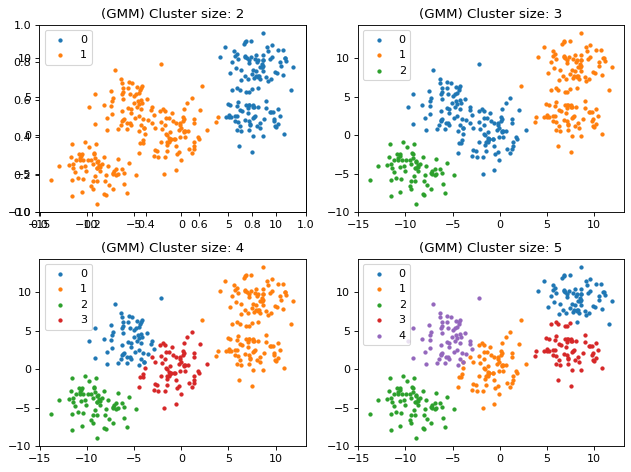

In [6]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    gm = GaussianMixture(n_components=i).fit(x)
    pred = gm.predict(x)
    df = DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label': pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
        plt.title("(GMM) Cluster size: " + str(i))
        plt.legend()
plt.tight_layout()
plt.show()

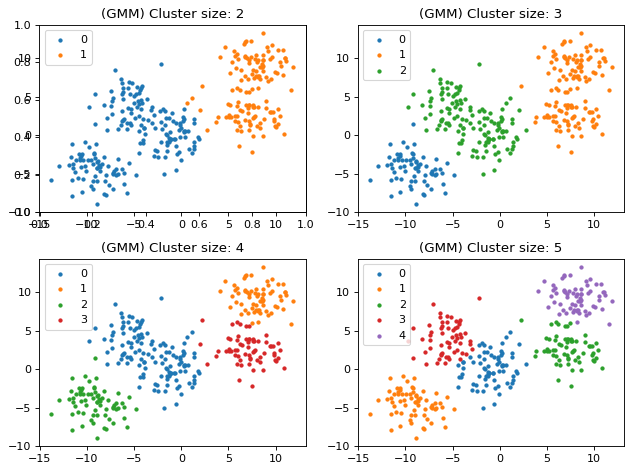

In [7]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    km = KMeans(n_clusters=i).fit(x)
    pred = km.predict(x)
    df = DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label': pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
        plt.title("(GMM) Cluster size: " + str(i))
        plt.legend()
plt.tight_layout()
plt.show()

# Gom cụm dựa vào thuật toán Mahalanobis k-means

In [1]:
from scipy.spatial.distance import mahalanobis
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

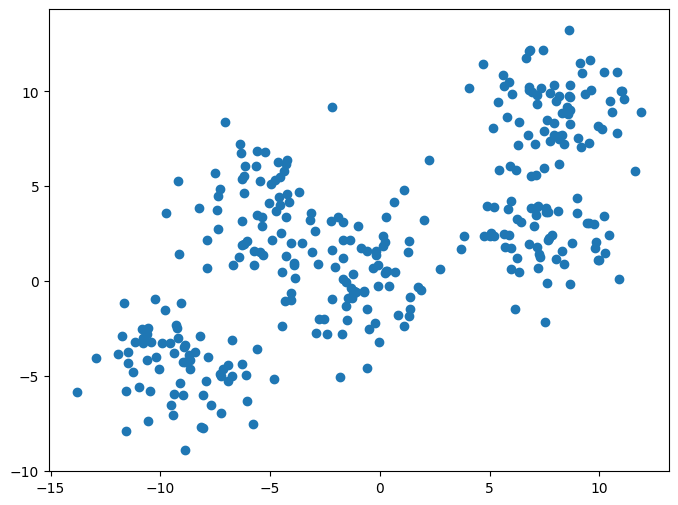

In [9]:
np.random.seed(234)
x, _ = make_blobs(n_samples=330, centers=5, cluster_std=1.84)
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [10]:
def mahalanobis_distance(x, y, cov):
    cov_inv = np.linalg.inv(cov)
    distance = np.sqrt(np.dot(np.dot((x - y).T, (cov_inv)), (x - y)))
    return distance

In [11]:
def mahalanobis_kmeans(data, k, max_iterations=100):
    # Khởi tạo tâm cụm ngẫu nhiên
    np.random.seed(1)
    centers = data[np.random.choice(data.shape[0], k, replace=False)]
    
    # Khởi tạo ma trận hiệp phương sai cho mỗi cụm
    cov = [np.eye(data.shape[1]) for _ in range(k)]

    # Khởi tạo nhãn cho mỗi điểm dữ liệu
    labels = np.zeros(data.shape[0])

    p = 0
    while p < max_iterations:
        # Tính toán khoảng cách Mahalanobis và gán nhãn cho từng điểm dữ liệu
        new_labels = np.zeros(data.shape[0])
        for i in range(data.shape[0]):
            distances = [mahalanobis_distance(data[i], centers[j], cov[j]) for j in range(k)]
            new_labels[i] = np.argmin(distances)

        # Kiểm tra sự thay đổi của nhãn
        if np.array_equal(new_labels, labels):
            break

        labels = new_labels

        # Cập nhật lại tâm cụm bằng cách lấy trung bình cộng các điểm thuộc cluster đó
        for j in range(k):
            centers[j] = np.mean(data[np.where(labels == j)], axis=0)
            cov[j] = np.cov(data[np.where(labels == j)].T)
        p += 1

    return centers, int(labels)


In [12]:
centers, labels = mahalanobis_kmeans(x, 5, 100)

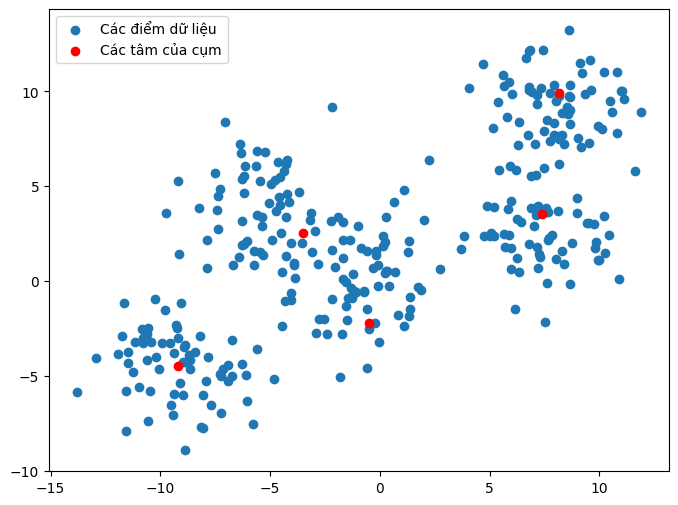

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], label="Các điểm dữ liệu")
plt.scatter(centers[:, 0], centers[:, 1], c='r', label="Các tâm của cụm")
plt.legend()
plt.show()

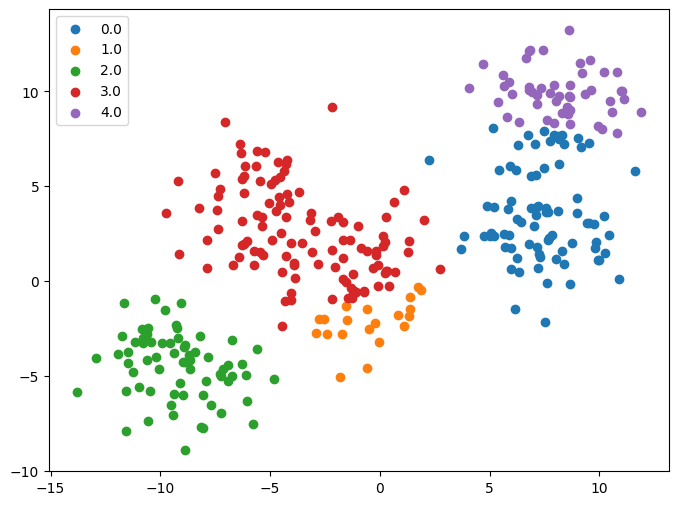

In [17]:
df = pd.DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label': labels})
groups = df.groupby('label')

ig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

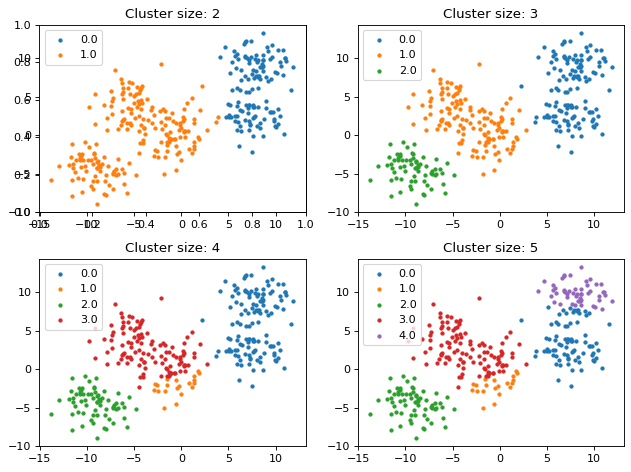

In [15]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    centers, labels = mahalanobis_kmeans(x, i, 100)
    df = pd.DataFrame({'x': x[:, 0], 'y': x[:, 1], 'label': labels})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
        plt.title("Cluster size: " + str(i))
        plt.legend()
plt.tight_layout()
plt.show()